In [65]:
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn
import statsmodels.formula.api as smf

# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [3]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

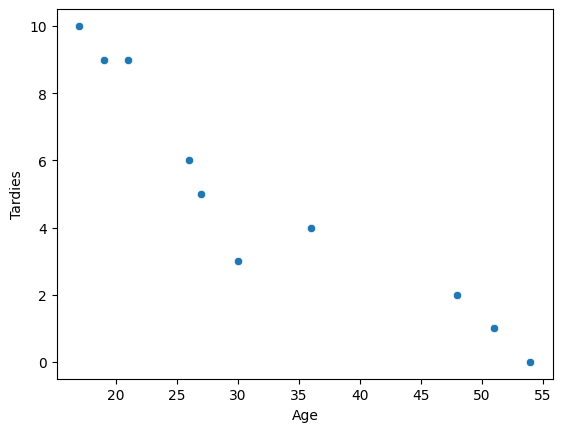

In [7]:
sns.scatterplot(x='Age', y='Tardies', data=student_data)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [8]:
# Yes, there's a positive skew, the tail is right-sided. 
# The hypothesis is correct, the central tendency is that the younger the student is, the later he arrives at class.
# The age is the independent variable, and it has a correlation with tardies. 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [11]:
correlation = student_data.corr()
covariation = student_data.cov()

In [15]:
print(correlation)

# There's a negative correlation, meaning that the higher the age is, the lower the tardies' value will be. 

              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000


In [14]:
print(covariation)

# There's a significant variance in the age variable. 
# The covariance here also indicates a negative relationship: as age increases, tardies tend to decrease.

                Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [19]:
# I need to use a linear regression model (there are only two variables).
# I want to be able to predict the expected tardiness depending on someone's age. 

In [24]:
# Y = m * X + n

# Y = tardiness
# X = age
# m = slope
# n = intercept

# We want to find 'm' and 'n' that best model our data.

In [33]:
# Extract predictor and outcome variables

x = student_data[['Age']]
y = student_data['Tardies']

lr = LinearRegression()

lr.fit(x, y) 

slope = lr.coef_
intercept = lr.intercept_

In [31]:
def ages_and_tardies (age):
    return lr.coef_[0] * age +  lr.intercept_

In [36]:
ages_and_tardies(20)

8.032387944816154

Plot your regression model on your scatter plot.

Slope (beta1): [-0.24282077]
Intercept (beta0): 12.888803363135771


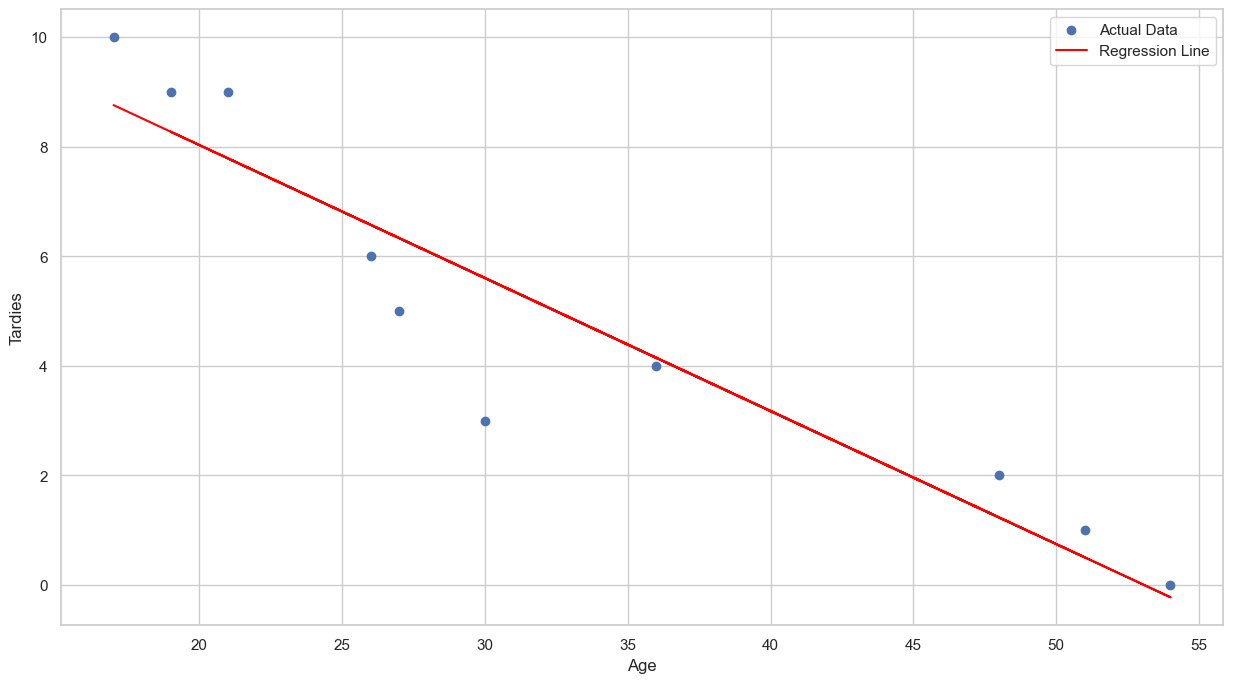

In [32]:
# Print the slope and intercept
print("Slope (beta1):", slope)
print("Intercept (beta0):", intercept)

# Predict Tardies based on Age
predictions = lr.predict(x)

# Plot the data and the regression line
plt.scatter(x, y, label='Actual Data')
plt.plot(x, predictions, color='red', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend()
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [41]:
result = smf.ols("Tardies ~ Age", data = student_data).fit()
result.summary()

/Users/usuari/miniconda3/envs/ironhack/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.57e-05
Time:                        18:06:16   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
# Correlation does not necessarily imply causality, so I'm sure this prediction wouldn't always be close to the real data.  
# Even so, yes, we can predict the tardiness of each student knowing the age.
# In addition, the model seems quite accurate as R2 = 0.8 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [47]:
csv_file = 'vehicles.csv'
vehicles = pd.read_csv(csv_file)
vehicles.head(2)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550


In [49]:
vehicles.columns = [i.lower().replace(" ", "_").replace("/", "_") for i in vehicles]
vehicles.head(2)

,make,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrels_year,city_mpg,highway_mpg,combined_mpg,co2_emission_grams_mile,fuel_cost_year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [52]:
vehicles["co2_emission_grams_mile"]. corr(vehicles["year"]) 

# The lower is the year, the higher co2 emissions there'll be?

-0.22229960295054227

In [53]:
vehicles["co2_emission_grams_mile"]. corr(vehicles["cylinders"]) 

0.752392553729749

In [54]:
vehicles["co2_emission_grams_mile"]. corr(vehicles["fuel_barrels_year"]) 

0.9861886621428735

In [55]:
vehicles["co2_emission_grams_mile"]. corr(vehicles["combined_mpg"]) 

-0.9262290389336435

In [56]:
vehicles["co2_emission_grams_mile"]. corr(vehicles["fuel_cost_year"]) 

0.9308651512201843

In [57]:
# The variable with higher correlation is "fuel_barrels_year" and the one with lowest correlation is "year".

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [58]:
X = vehicles[["year", "cylinders", "fuel_barrels_year", "combined_mpg", "fuel_cost_year"]]
y = vehicles["co2_emission_grams_mile"]

results = smf.ols("co2_emission_grams_mile ~ year + cylinders + fuel_barrels_year + combined_mpg + fuel_cost_year", data = vehicles).fit()

In [ ]:
# Multiple Linear Regression

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [59]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     co2_emission_grams_mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                             18:37:10   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           769.8883     19.392     39.702      0.000     731.880     807.897
year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
fuel_barrels_year    19.0529      0.061    311.600      0.000      18.933      19.173
combined_mpg         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
fuel_cost_year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
# All the columns tested for the p_values compared to the 't' are 0, so all of them are useful to predict CO2 emissions.
# The model is really accurate: the R2 and the adjusted R2 are the same and they're 0.981. 
# However, there are a lot of residuals. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [62]:
party = pd.DataFrame({'x': [1,3,4,6,8,9,11,14], 'y': [1, 2, 4, 4, 5, 7, 8, 13]})
party.head(2)

,x,y
0,1,1
1,3,2


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [68]:
p = LinearRegression() 

X = party[["x"]]
y = party.y
p.fit(X,y)

LinearRegression()

In [70]:
party["prediction_linear_reg"] = X * p.coef_[0] + p.intercept_

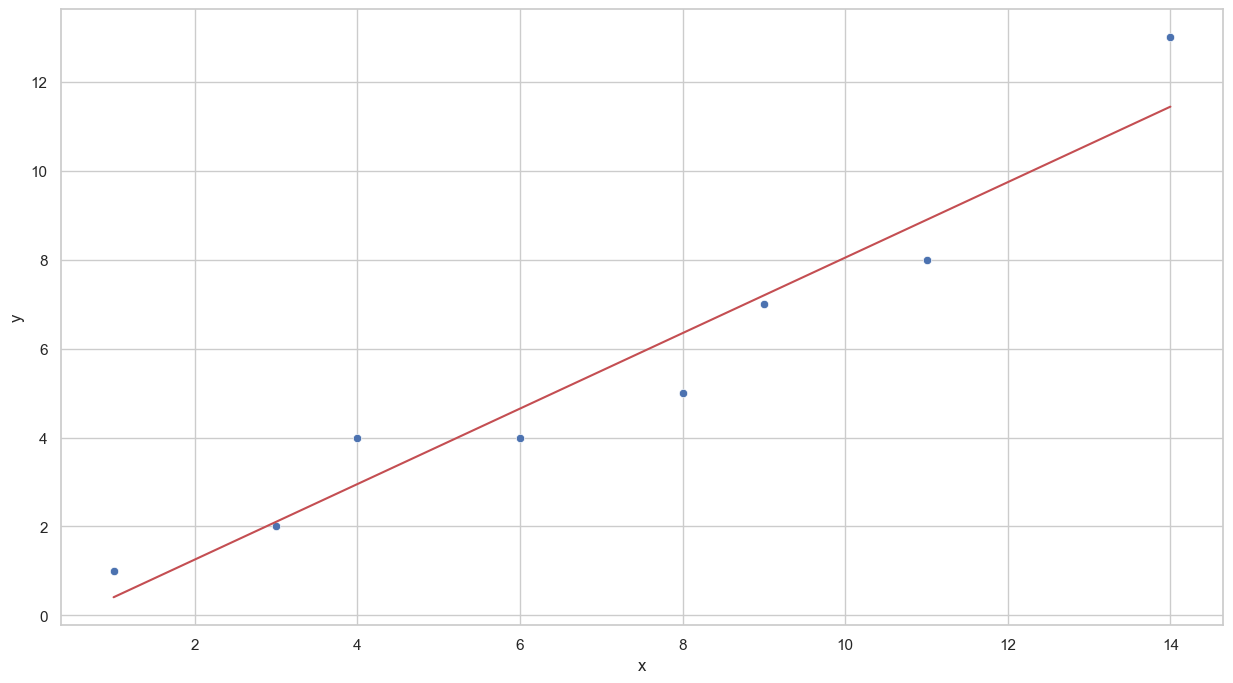

In [71]:
sns.scatterplot(x="x", y="y", data=party)
plt.plot(party.x, party["prediction_linear_reg"], c="r");

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# What the plot is showing us does not correspond with the previous hypothesis.
# Apparently the more people are invited, the more people are attending the party. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# If I had to highlight any problematic point, maybe it would the '14' in axis x, where the corresponding 'y' is higher than predicted.

In [73]:
party = party.drop(index=7)
party

,x,y,prediction_linear_reg
0,1,1,0.409091
1,3,2,2.106061
2,4,4,2.954545
3,6,4,4.651515
4,8,5,6.348485
5,9,7,7.196970
6,11,8,8.893939


In [75]:
m = LinearRegression() 

X = party[["x"]]
y = party.y
m.fit(X,y)

party["prediction_linear_m"] = X * p.coef_[0] + p.intercept_

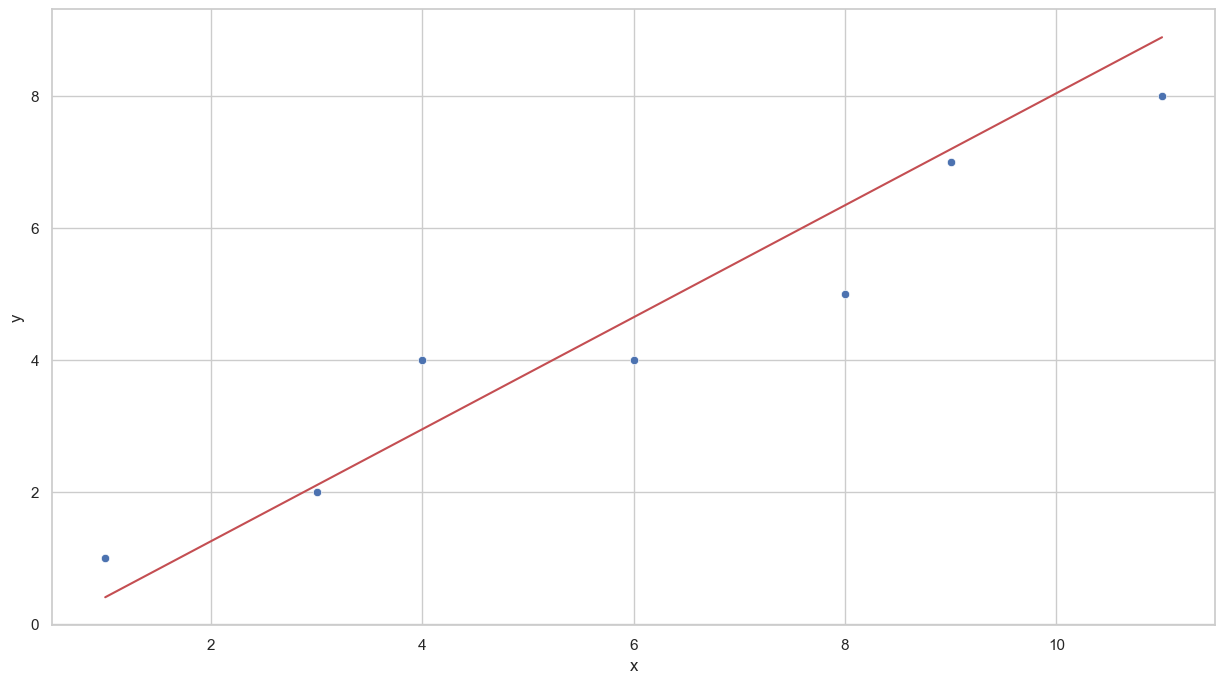

In [76]:
sns.scatterplot(x="x", y="y", data=party)
plt.plot(party.x, party["prediction_linear_m"], c="r");

In [78]:
smf.ols("y ~ x", data = party).fit().summary()

/Users/usuari/miniconda3/envs/ironhack/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           0.000264
Time:                        19:08:25   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3233      0.513      0.630      0.556      -0.996       1.642
x              0.6842      0.075      9.127      0.000       0.492       0.877
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.689
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.379
Skew:                           0.284   Prob(JB):                        0.827
Kurtosis:                       2.012   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [1]:
# The second model seems more accurate. The standard deviation between the data points is lower so the standard error of the second model should also be lower than the one in the first model. 